# DATA 589 - Project

## Exploratory Data Analysis (EDA) On The Parsed Logs Dataset

### 1. Describe your dataset

- This dataset was obtained from Loghub (https://github.com/logpai/loghub), which holds a collection of system logs that are freely accessible for research purposes.

- The HDFS_1 logs was originally produced for the following research paper: "Detecting Large-Scale System Problems by Mining Console Logs" by Wei Xu, Ling Huang, Armando Fox, David Patterson, and Michael I. Jordan.

- The researchers above collected the HDFS logs from a Hadoop cluster running on over 200 EC2 nodes, yielding 24 million lines of logs.

- The raw logs are parsed using the Drain parser from the logparser library (https://github.com/logpai/logparser).

- The parsed dataset consists of 10 columns and 11175629 rows which are described below: 

    1. `LineId`: ID for each line of logs
    2. `Date`: The date that the logs were created
    3. `Time`: The time that the logs were created
    4. `Pid`: Process ID
    5. `Level`: The level of the log (INFO or WARN)
    6. `Component`: The component of the log (e.g. dfs.DataNode\$PacketResponder)
    7. `Content`: The content of the log 
    8. `EventId`: Event ID
    9. `EventTemplate`: The template for the events
    10. `ParameterList`: List of parameters for that particular log   
    
    
- The parsed logs data have/don't have null values, and the data types for each column are described below:

    1. `LineId`: int
    2. `Date`: int
    3. `Time`: int
    4. `Pid`: int
    5. `Level`: object
    6. `Component`: object
    7. `Content`: object
    8. `EventId`: object
    9. `EventTemplate`: object
    10. `ParameterList`: object
    
    
- Since some of the datatypes are still not proper, we will parse it to the appropriate data types in the following sections.

- The was collected from 2008-11-09 20:36:15 to 2008-11-11 10::, totaling 38.7 hours of logs data.

### 2. Load the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
HDFS_parsed = pd.read_csv('parse/parsed_data/HDFS.log_structured.csv')
HDFS_label = pd.read_csv('parse/raw_data/anomaly_label.csv')

### 3. Explore your dataset

As described in section 1, the dataset consist of 11175629 rows and 10 columns.

In [3]:
HDFS_parsed.shape

(11175629, 10)

To get started, let's view the first few rows of the data.

In [4]:
HDFS_parsed.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,81109,203518,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,09a53393,Receiving block <*> src: <*> dest: <*>,"['blk_-1608999687919862906', '/10.250.19.102:5..."
1,2,81109,203518,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...,3d91fa85,BLOCK* NameSystem.allocateBlock: <*> <*>,['/mnt/hadoop/mapred/system/job_200811092030_0...
2,3,81109,203519,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,09a53393,Receiving block <*> src: <*> dest: <*>,"['blk_-1608999687919862906', '/10.250.10.6:405..."
3,4,81109,203519,145,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,09a53393,Receiving block <*> src: <*> dest: <*>,"['blk_-1608999687919862906', '/10.250.14.224:4..."
4,5,81109,203519,145,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_-1608999687919...,d38aa58d,PacketResponder <*> for block <*> <*>,"['1', 'blk_-1608999687919862906 terminating']"


Next, we want to see the data types of each column using .info(). Some data types are not appropriate for the columns hence we will change it to the appropriate data types if necessary.

In [5]:
HDFS_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11175629 entries, 0 to 11175628
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   LineId         int64 
 1   Date           int64 
 2   Time           int64 
 3   Pid            int64 
 4   Level          object
 5   Component      object
 6   Content        object
 7   EventId        object
 8   EventTemplate  object
 9   ParameterList  object
dtypes: int64(4), object(6)
memory usage: 852.6+ MB


Based on the check below, there is no missing values in the data.

In [6]:
HDFS_parsed.isnull().sum()

LineId           0
Date             0
Time             0
Pid              0
Level            0
Component        0
Content          0
EventId          0
EventTemplate    0
ParameterList    0
dtype: int64

The .describe() function might not be useful here as we haven't convert the data types for the date and time to a datetime data type.

In [7]:
HDFS_parsed.describe()

,LineId,Date,Time,Pid
count,1.117563e+07,1.117563e+07,1.117563e+07,1.117563e+07
mean,5.587815e+06,8.111040e+04,1.075910e+05,8.058798e+03
std,3.226126e+06,6.305535e-01,6.833246e+04,9.371111e+03
min,1.000000e+00,8.110900e+04,0.000000e+00,1.300000e+01
25%,2.793908e+06,8.111000e+04,5.350100e+04,2.800000e+01
50%,5.587815e+06,8.111000e+04,9.433500e+04,2.861000e+03
75%,8.381722e+06,8.111100e+04,1.459520e+05,1.642500e+04
max,1.117563e+07,8.111100e+04,2.359590e+05,2.789400e+04


In [8]:
HDFS_parsed.LineId.value_counts()

1           1
7450423     1
7450415     1
7450416     1
7450417     1
           ..
3725213     1
3725214     1
3725215     1
3725216     1
11175629    1
Name: LineId, Length: 11175629, dtype: int64

In [9]:
HDFS_parsed.Date.value_counts()

81111    5362174
81110    4934076
81109     879379
Name: Date, dtype: int64

In [10]:
HDFS_parsed.Time.value_counts()

75622     5175
110439    5036
75635     5008
110430    4985
44322     4979
          ... 
154920       1
154913       1
154907       1
154905       1
153927       1
Name: Time, Length: 85053, dtype: int64

In [11]:
HDFS_parsed.Pid.value_counts()

19       1288017
28        539758
27        444086
26        441387
30        437971
          ...   
27861          1
27863          1
115            1
27865          1
27867          1
Name: Pid, Length: 27799, dtype: int64

In [12]:
HDFS_parsed.Level.value_counts()

INFO    10812836
WARN      362793
Name: Level, dtype: int64

In [13]:
HDFS_parsed.Component.value_counts()

dfs.FSNamesystem                                          3700245
dfs.DataNode$PacketResponder                              3413350
dfs.DataNode$DataXceiver                                  2518678
dfs.FSDataset                                             1407597
dfs.DataBlockScanner                                       120046
dfs.DataNode                                                 7002
dfs.DataNode$DataTransfer                                    6946
dfs.DataNode$BlockReceiver                                   1718
dfs.PendingReplicationBlocks$PendingReplicationMonitor         47
Name: Component, dtype: int64

In [14]:
HDFS_parsed.Content.value_counts()

10.250.14.224:50010:Got exception while serving blk_-1347702416509823842 to /10.250.14.224:           15
10.251.30.179:50010:Got exception while serving blk_2356980171746022239 to /10.251.30.179:            13
10.251.215.192:50010:Got exception while serving blk_8512415457710305414 to /10.251.215.192:          13
Deleting block blk_-1608999687919862906 file /mnt/hadoop/dfs/data/current/blk_-1608999687919862906    10
10.251.194.213:50010:Got exception while serving blk_3584987098972940224 to /10.251.194.213:          10
                                                                                                      ..
PacketResponder 1 for block blk_-4367324059836143636 terminating                                       1
PacketResponder 1 for block blk_8988509216114701029 terminating                                        1
Receiving block blk_-6702683228653340719 src: /10.250.14.143:59022 dest: /10.250.14.143:50010          1
PacketResponder 1 for block blk_-921773494081551734 ter

In [15]:
HDFS_parsed.EventId.value_counts()

09a53393    1723232
5d5de21c    1719741
d38aa58d    1706728
e3df2680    1706514
dba996ef    1402047
d63ef163    1396174
3d91fa85     575061
626085d5     428726
81cee340     356207
32777b38     120036
d6b7b743       7097
73c2ec69       6937
40651754       6837
728076ac       6837
2e68ccc3       5545
bcc910df       3226
0567184d       1464
8f2bc724       1288
c294d20f        975
75627efd        165
54e5f6b4        165
69bca6e5         75
d013b7a3         75
ace40671         67
b15ffff8         65
f266840a         56
f79898ae         47
461a1574         34
2f85639c         33
f0d1ff15         22
506b3c4b         19
124068c6         16
71cf10b1         16
234302e6         15
e024fa48         11
fcd37a6d         10
78915d3a         10
4610d0f1          9
68429f34          9
c61b491b          7
2ecc047e          6
ff00cd08          5
5c88d71b          5
06d16156          5
13eb7010          4
559305d8          3
0f86472a          2
b65fc512          1
Name: EventId, dtype: int64

In [16]:
HDFS_parsed.EventTemplate.value_counts()

Receiving block <*> src: <*> dest: <*>                                                                                                                                                                               1723232
BLOCK* NameSystem.addStoredBlock: blockMap updated: <*> is added to <*> size <*>                                                                                                                                     1719741
PacketResponder <*> for block <*> <*>                                                                                                                                                                                1706728
Received block <*> of size <*> from <*>                                                                                                                                                                              1706514
Deleting block <*> file <*>                                                                                         

In [17]:
HDFS_parsed.ParameterList.value_counts()

['10.250.14.224:50010:', 'blk_-1347702416509823842', '/10.250.14.224:']                  15
['10.251.30.179:50010:', 'blk_2356980171746022239', '/10.251.30.179:']                   13
['10.251.215.192:50010:', 'blk_8512415457710305414', '/10.251.215.192:']                 13
['10.251.194.213:50010:', 'blk_3584987098972940224', '/10.251.194.213:']                 10
['blk_-1608999687919862906', '/mnt/hadoop/dfs/data/current/blk_-1608999687919862906']    10
                                                                                         ..
['blk_8527025923233783401', '/10.251.43.192:50766', '/10.251.43.192:50010']               1
['blk_988213790039510915', '/10.251.214.175:44669', '/10.251.214.175:50010']              1
['blk_-6881586002618630781', '/10.251.122.38:34497', '/10.251.122.38:50010']              1
['0', 'blk_-3250042454408216110 terminating']                                             1
['blk_4258862871822415442']                                                     

### 4. Initial Thoughts

- The logs are produced from `2008-11-11` (47.98%), `2008-11-10` (44.15%), `2008-11-09` (7.86%).
- The top 5 times that the logs are produced are on `07:56:22`, `11:04:39`, `07:56:35`, `11:04:30`, and `04:03:22` on each day.
- The top 5 Process ID that generated the most logs are: `19`, `28`, `27`, `26`, `30`. The top 5 Process ID that generated the least number of logs are: `27861`, `27863`, `115`, `27865`, and `27867`. This would be interesting to investigate further.
- In general, the logs consist of 96.75% `INFO` and 3.25% `WARN`.
- The component with the most lines of logs is `dfs.FSNamesystem` and the component with the least lines of logs is `dfs.PendingReplicationBlocks$PendingReplicationMonitor`
- The top 3 event ID with the most lines of code are `09a53393`, `5d5de21c`, and `d38aa58d`. The top 3 event id with the least lines of code are `b65fc512`, `0f86472a`, `559305d8`.
- The template with that produce the most logs is `Receiving block <*> src: <*> dest: <*>` and the least logs is `writeBlock <*> received exception java.net.NoRouteToHostException: No route to host`.

### 5. Wrangling

In [18]:
# For date
HDFS_parsed['Year']="0"+HDFS_parsed['Date'].astype(str).str[:1]
HDFS_parsed['Month']=HDFS_parsed['Date'].astype(str).str[1:3]
HDFS_parsed['Day']=HDFS_parsed['Date'].astype(str).str[3:5]
# For time
HDFS_parsed['Time_length']  = HDFS_parsed['Time'].astype(str).str.len()
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 6, 'Hour'] = HDFS_parsed['Time'].astype(str).str[:2]
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 6, 'Minute'] = HDFS_parsed['Time'].astype(str).str[2:4]
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 6, 'Second'] = HDFS_parsed['Time'].astype(str).str[4:6]
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 5, 'Hour'] = HDFS_parsed['Time'].astype(str).str[:1]
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 5, 'Minute'] = HDFS_parsed['Time'].astype(str).str[1:3]
HDFS_parsed.loc[HDFS_parsed['Time_length'] == 5, 'Second'] = HDFS_parsed['Time'].astype(str).str[3:5]
HDFS_parsed.drop('Time_length', axis=1, inplace=True)

### 6. Research Questions

- How do different types of parser from logparser library compare with each other, in terms of its parsing accuracy?
- What is the accuracy of using CNN to predict anomaly on structured/parsed log data?
- How does the CNN model created based on the HDFS_1 dataset perform on other log dataset?

### 7. Data Analysis and Visualization

#### Level distribution of the log data

In [19]:
Level_count = HDFS_parsed['Level'].value_counts()
Level_count

INFO    10812836
WARN      362793
Name: Level, dtype: int64

Text(0.5, 1.0, 'Distribution of Level of HDFS log data')

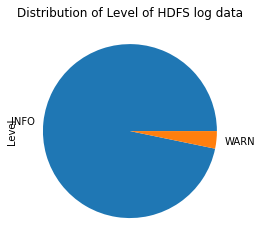

In [20]:
ax = Level_count.plot(kind='pie')
ax.set_title("Distribution of Level of HDFS log data")

#### Pid distribution of the log data

In [21]:
Pid_count = HDFS_parsed['Pid'].value_counts()
Pid_count

19       1288017
28        539758
27        444086
26        441387
30        437971
          ...   
27861          1
27863          1
115            1
27865          1
27867          1
Name: Pid, Length: 27799, dtype: int64

Text(0.5, 1.0, 'Top 10 Pid appeared in HDFS log data')

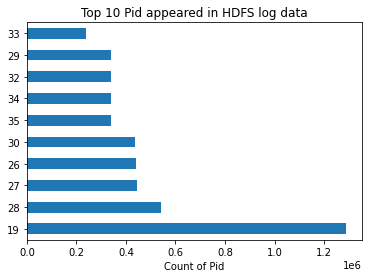

In [22]:
Pid_count[:10].plot(kind='barh')
plt.xlabel('Count of Pid')
plt.title("Top 10 Pid appeared in HDFS log data")

#### Component distribution of the log data

In [23]:
Component_count = HDFS_parsed['Component'].value_counts()
Component_count

dfs.FSNamesystem                                          3700245
dfs.DataNode$PacketResponder                              3413350
dfs.DataNode$DataXceiver                                  2518678
dfs.FSDataset                                             1407597
dfs.DataBlockScanner                                       120046
dfs.DataNode                                                 7002
dfs.DataNode$DataTransfer                                    6946
dfs.DataNode$BlockReceiver                                   1718
dfs.PendingReplicationBlocks$PendingReplicationMonitor         47
Name: Component, dtype: int64

Text(0.5, 1.0, 'Distribution of Components of HDFS log data')

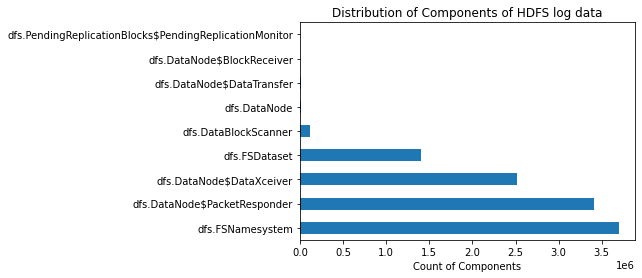

In [24]:
Component_count.plot(kind='barh')
plt.xlabel('Count of Components')
plt.title("Distribution of Components of HDFS log data")

#### Time distribution of the log data

In [25]:
Day_count = HDFS_parsed['Day'].value_counts()
Day_count

11    5362174
10    4934076
09     879379
Name: Day, dtype: int64

Text(0.5, 1.0, 'Distribution of Day of HDFS log data')

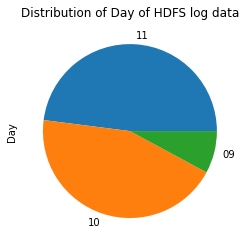

In [26]:
ax = Day_count.plot(kind='pie')
ax.set_title("Distribution of Day of HDFS log data")

Text(0.5, 1.0, 'Distribution of Hour of HDFS log data')

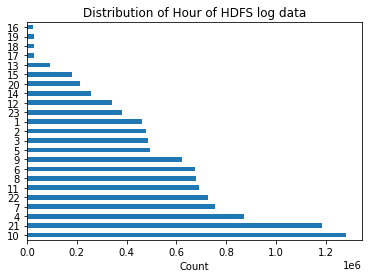

In [27]:
Hour_count = HDFS_parsed['Hour'].value_counts()
Hour_count.plot(kind='barh')
plt.xlabel('Count')
plt.title("Distribution of Hour of HDFS log data")

### 8. Summary and Conclusions

Since EDA is just an initial step to explore the data, some of the research questions in section 6 may not be answerable until we finished building and comparing the methods and models. 

However, based on our initial EDA, we've learned that:

- The parsed log data based on our chosen parser method is relatively clean and there is no missing values.
- During these time of the day `07:56:22`, `11:04:39`, `07:56:35`, `11:04:30`, and `04:03:22`, the logs produced are higher than any other time during the day. 
- The top `ProcessId`, `EventId`, `Component`, and `EventTemplate` that generated the most and least number of logs would be of interest for future exploration as that might lead to discovering an anomaly in the logs. 

### 9. Project Proposal Plan

1. **Data**: Download the `HDFS_1` logs data from Loghub (https://github.com/logpai/loghub).
2. **Log-parsing**: Parse the unstructured logs data using `Drain` from the `Logparser` library (https://github.com/logpai/logparser).
3. **Feature Extraction**: Pre-process the structured logs data using `TF-IDF` (Term Frequency-Inverse Document Frequency) so that it is suitable for input to the model. This step will produce a feature matrix for input into the next step.
4. **Model**: Predict or detect anomaly logs using supervised method, `CNN` (Convolutional Neural Network) model.
5. **Accuracy**: Calculate the accuracy of the prediction by comparing the result with the existing anomaly/normal labels for the logs.